## ML_Groupwork:
### Data_processing:

**Read data from the csv file**

In [1]:
import pandas as pd
import numpy as np
# import drawing libraries
import matplotlib.pyplot as plt
import seaborn as sns
# read data from csv
df = pd.read_csv("dly532.csv",na_values=" ")
df.head().round(2)

,date,maxtp,mintp,igmin,gmin,cbl,wdsp,hm,ddhm,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd,Rainy
0,1-Jan-01,10.9,4.6,0,1.5,965.7,10.0,18,190,26,0.4,0.0,175.0,4.80,0.5,0.6,0.0,-1.0,-10.0,1
1,2-Jan-01,8.9,1.0,1,-0.2,972.0,9.7,20,280,29,0.0,0.0,154.0,5.03,0.4,0.5,0.0,-1.2,-10.0,1
2,3-Jan-01,7.8,1.1,1,-1.0,977.0,10.3,16,220,23,0.1,0.0,119.0,3.30,0.4,0.5,0.0,-4.3,-10.0,1
3,4-Jan-01,6.9,-0.2,1,-0.5,975.5,6.1,12,250,16,0.5,0.0,196.0,3.92,0.1,0.1,0.0,0.0,-9.5,-1
4,5-Jan-01,2.2,-1.3,1,-5.7,977.4,7.1,14,250,19,0.0,0.0,170.0,2.58,0.1,0.1,0.0,0.0,-9.1,-1


In [2]:
# Show data shape
df.shape

(7609, 20)

**Check null value in the data**

In [3]:
df.isna().any(axis=0)

date      False
maxtp     False
mintp     False
igmin     False
gmin       True
cbl       False
wdsp      False
hm        False
ddhm      False
hg        False
sun       False
dos        True
g_rad      True
soil      False
pe        False
evap       True
smd_wd    False
smd_md    False
smd_pd    False
Rainy     False
dtype: bool

In [4]:
df.describe().round(2) 

,maxtp,mintp,igmin,gmin,cbl,wdsp,hm,ddhm,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd,Rainy
count,7609.00,7609.00,7609.00,7604.00,7609.00,7609.00,7609.00,7609.00,7609.00,7609.00,7608.00,7536.00,7609.00,7609.00,7607.00,7609.00,7609.00,7609.00,7609.00
mean,13.48,5.84,0.24,4.09,1003.20,10.46,17.92,204.19,25.55,4.16,0.03,975.62,10.57,1.51,2.17,14.79,14.04,10.89,-0.26
std,4.93,4.58,0.44,5.36,11.76,4.28,6.33,84.65,9.16,3.78,0.61,718.52,5.21,1.02,1.49,18.41,19.12,23.12,0.97
min,-4.70,-12.20,0.00,-12.70,951.00,2.10,4.00,0.00,7.00,0.00,0.00,12.00,-0.22,0.00,0.00,0.00,-10.00,-10.00,-1.00
25%,9.80,2.40,0.00,0.10,995.90,7.20,13.00,140.00,19.00,0.70,0.00,334.00,6.15,0.70,0.90,0.50,0.50,-8.10,-1.00
50%,13.40,6.00,0.00,4.30,1004.20,9.70,17.00,230.00,24.00,3.40,0.00,833.00,10.28,1.30,1.80,5.60,5.60,0.10,-1.00
75%,17.40,9.40,0.00,8.10,1011.30,13.00,22.00,270.00,31.00,6.70,0.00,1485.00,15.02,2.20,3.30,24.80,24.80,26.40,1.00
max,26.90,18.20,4.00,17.20,1035.20,28.80,53.00,360.00,80.00,15.90,20.00,3047.00,25.18,5.70,8.10,94.30,94.30,96.70,1.00


From this we could see that there is missing value in gmin, dos, g_rad and evap. And here I would use the mean value to fill in the missing value.

In [5]:
df['gmin'].fillna(df['gmin'].mean(),inplace=True)
df['dos'].fillna(df['dos'].mean(),inplace=True)
df['g_rad'].fillna(df['g_rad'].median(),inplace=True)
df['evap'].fillna(df['evap'].mean(),inplace=True)

After filling in the missing value, check the missing value again.

In [6]:
df.isna().any(axis=0)

date      False
maxtp     False
mintp     False
igmin     False
gmin      False
cbl       False
wdsp      False
hm        False
ddhm      False
hg        False
sun       False
dos       False
g_rad     False
soil      False
pe        False
evap      False
smd_wd    False
smd_md    False
smd_pd    False
Rainy     False
dtype: bool

<AxesSubplot:xlabel='Rainy', ylabel='count'>

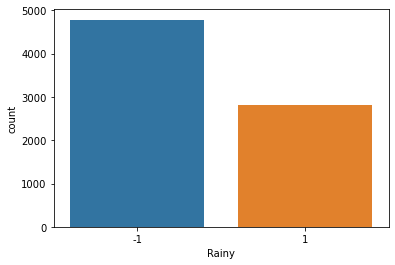

In [7]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df['Rainy'])

### Handling outliers
**Drawing box plots to identify ourliers in the numerical columns**

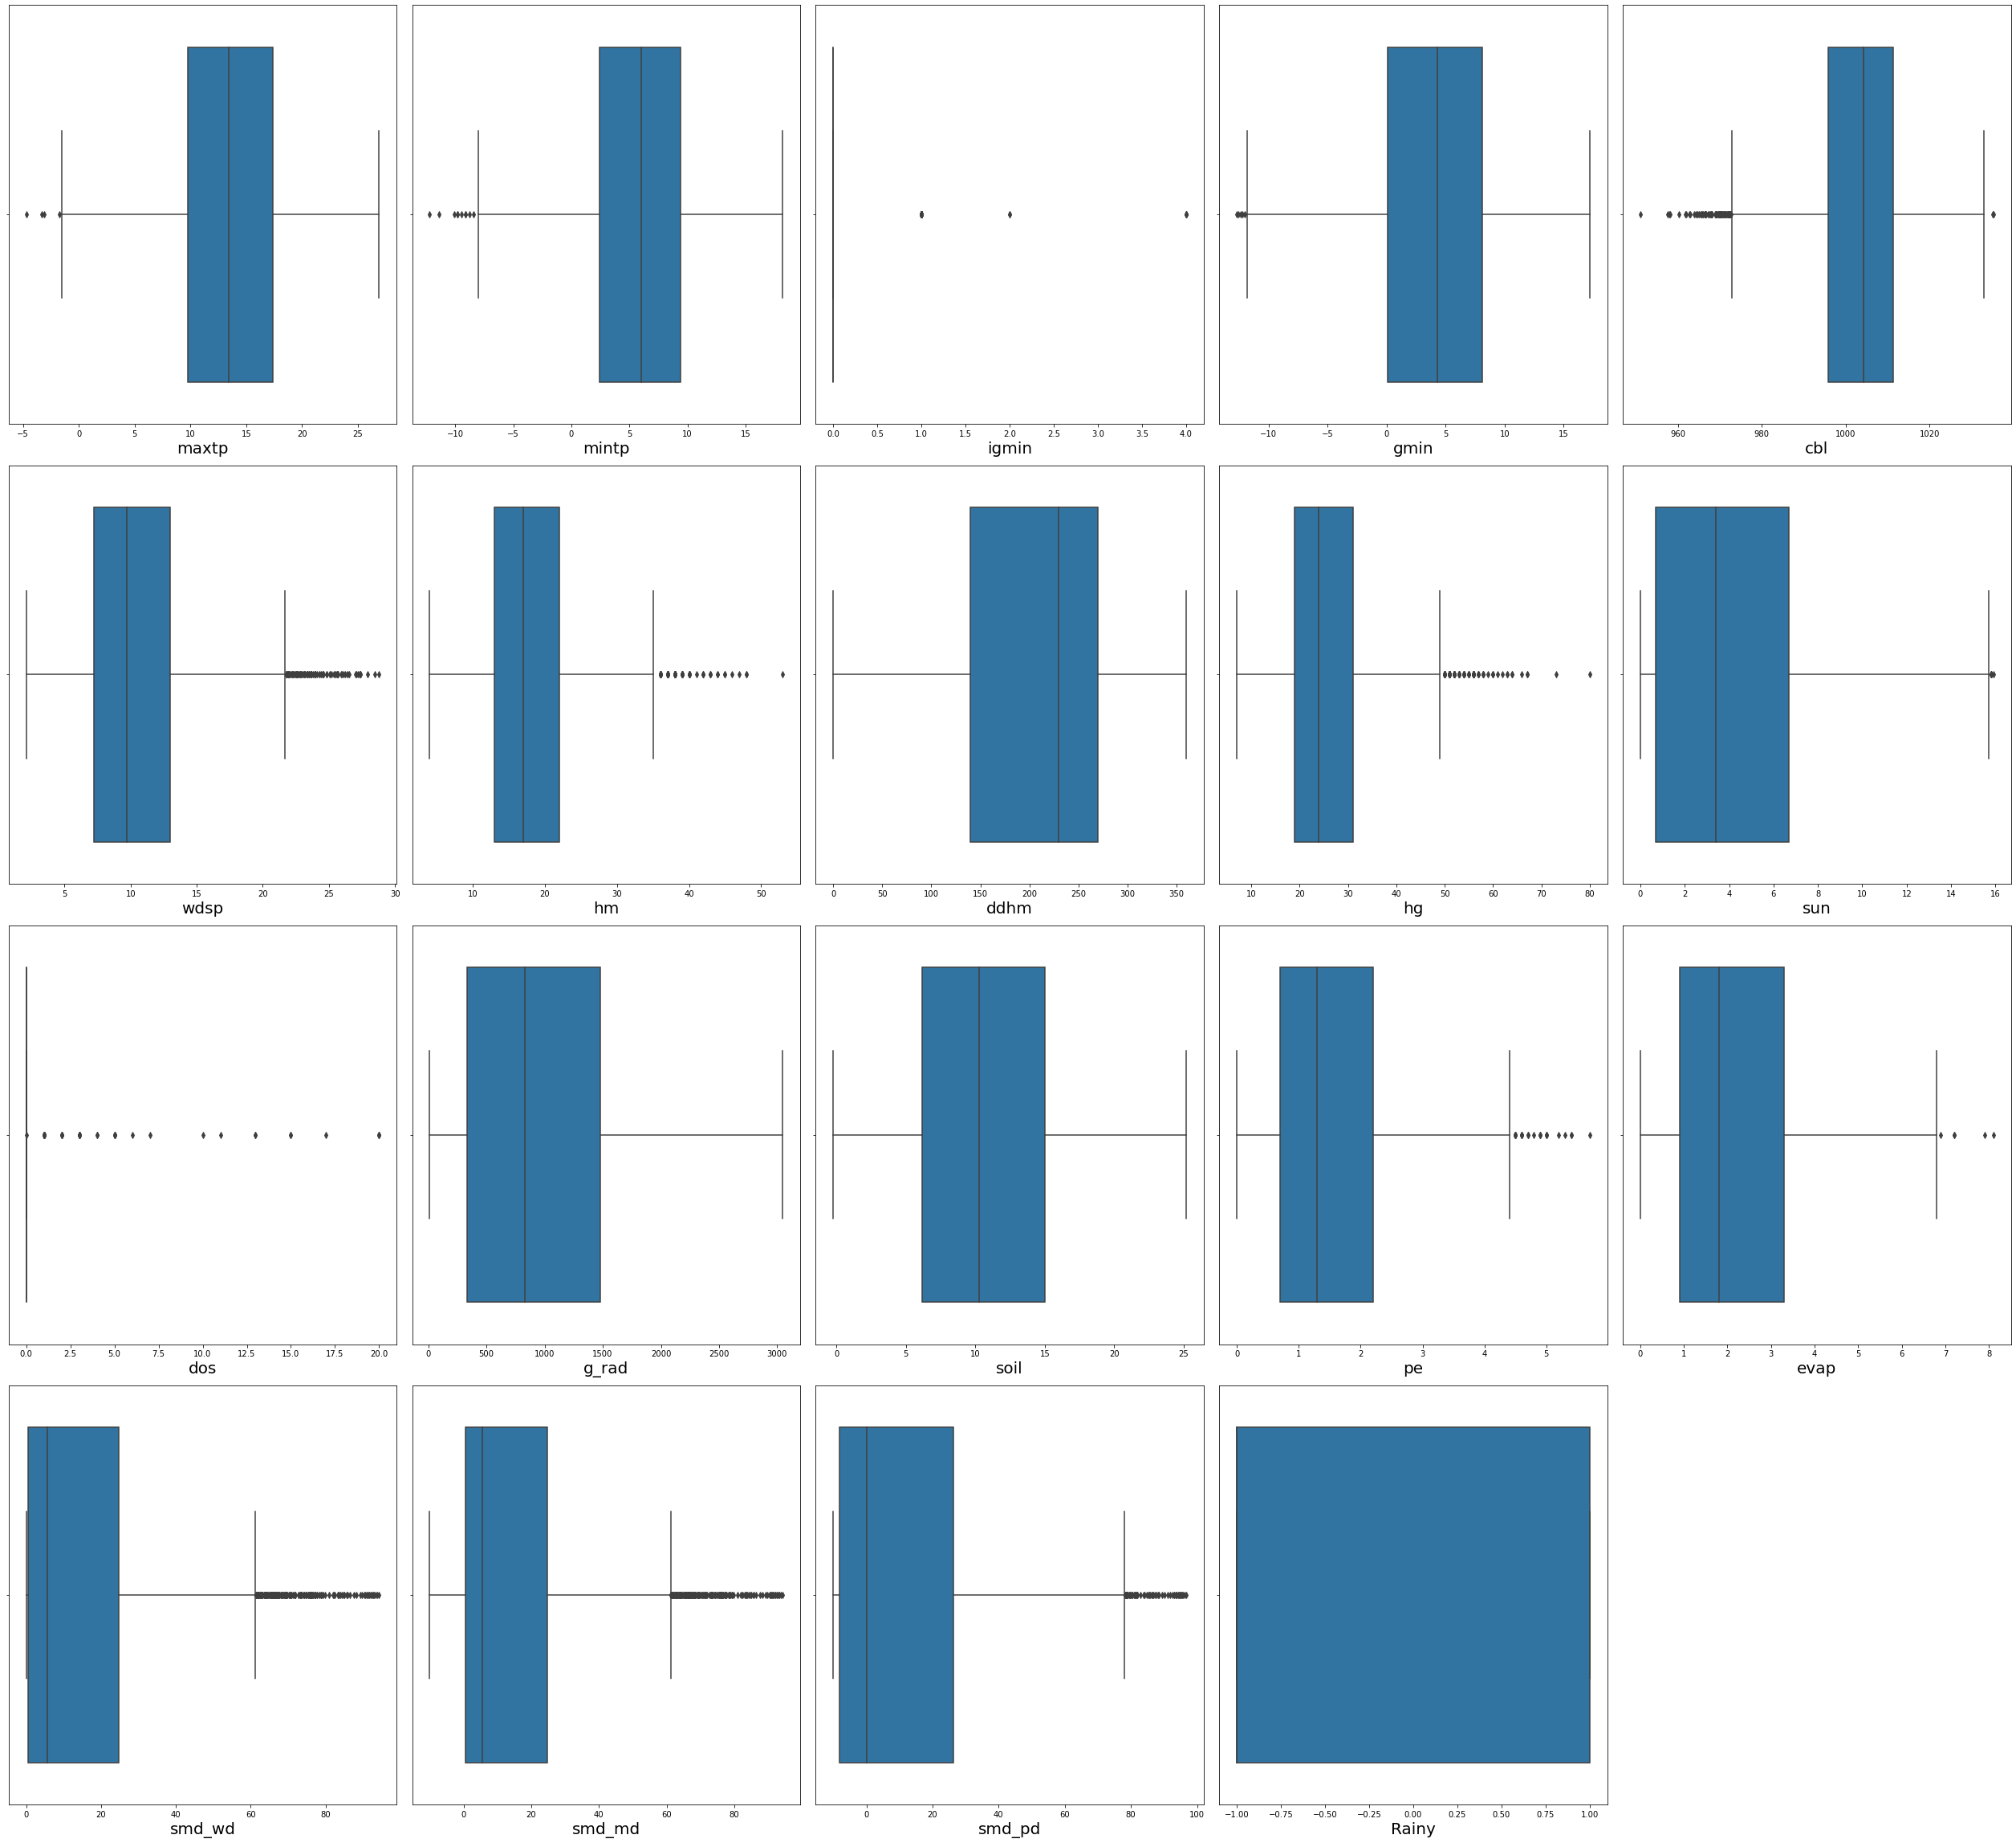

In [8]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
a=4
b=5
c=1
fig = plt.figure(figsize=(35,32))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        fig = sns.boxplot(df[i])
        fig.set_xlabel(i,fontsize=20)
        c = c+1
    if df[i].dtype=='int64':
        plt.subplot(a, b, c)
        fig = sns.boxplot(df[i])
        fig.set_xlabel(i,fontsize=20)
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()  

Remove the outliers

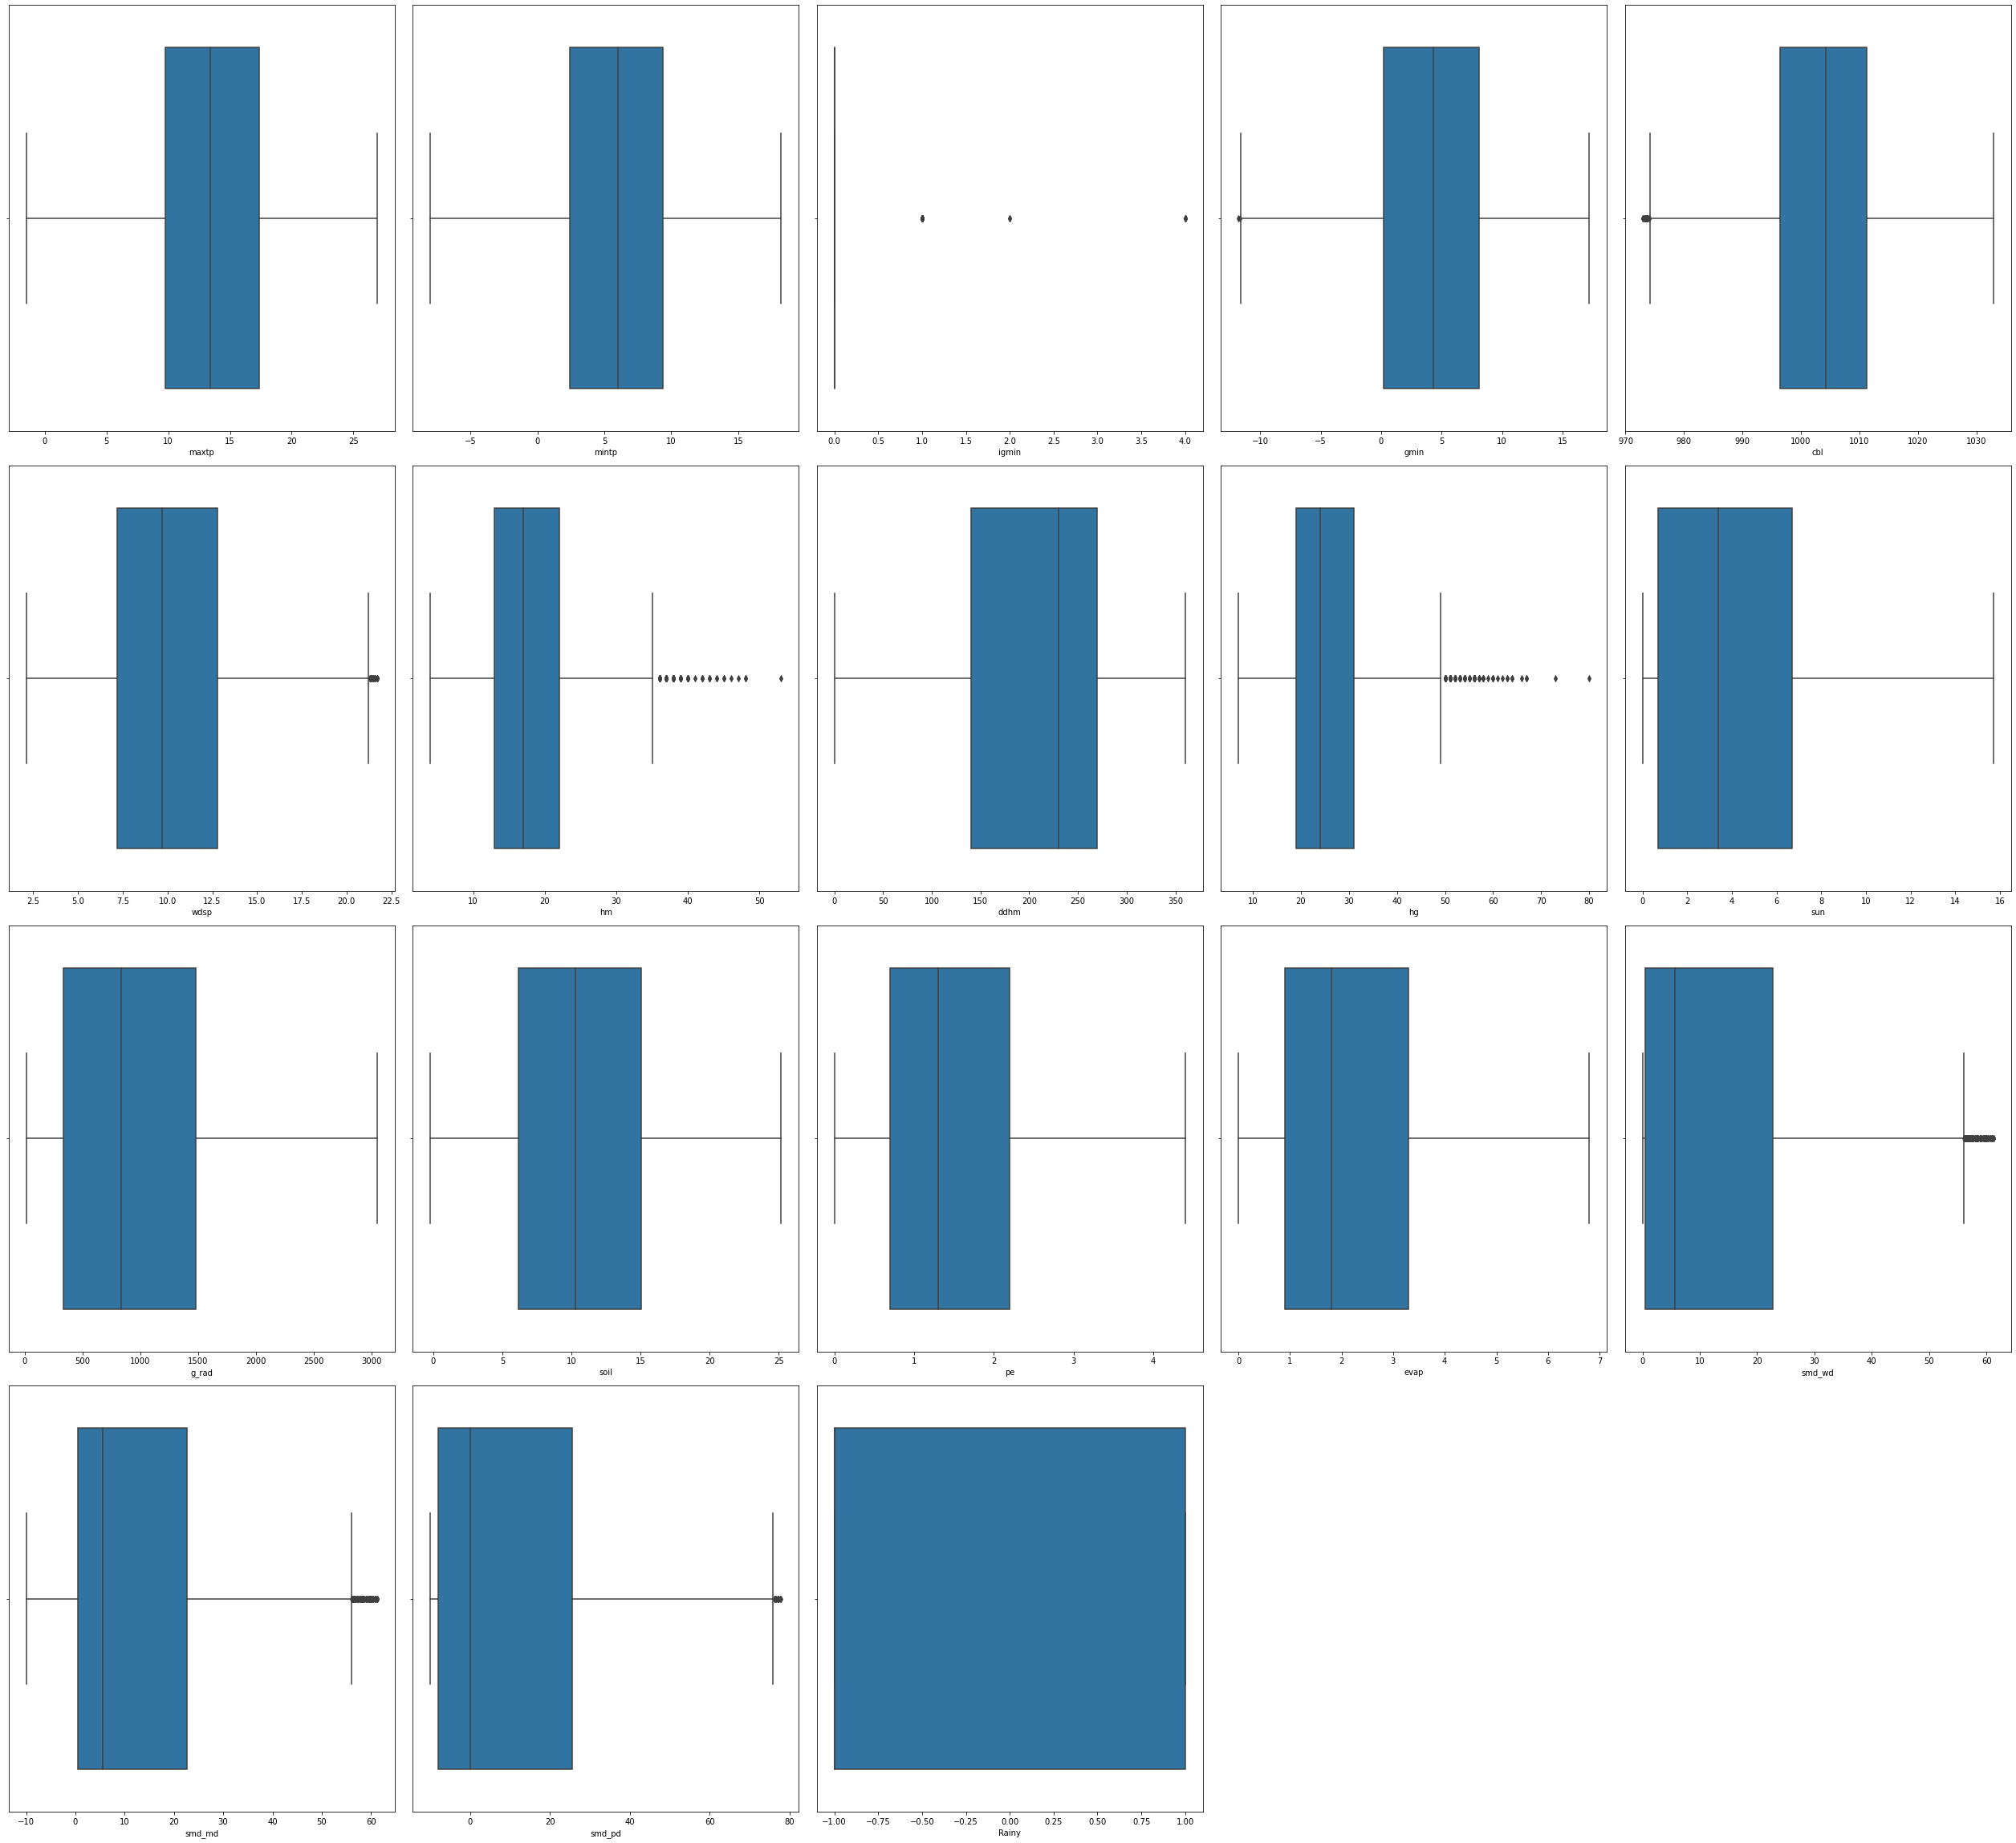

In [9]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
# Removing outliers
# Replace with mean value
for i in df:
    if i=="dos": continue
    if df[i].dtype=='float64':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df[i])
        for j in df[i]:
            if j > Upper_tail or j < Lower_tail:
                df[i] = df[i].replace(j, med)
    else:
        continue
a=4
b=5
c=1
fig = plt.figure(figsize=(35,32))
for i in df:
    if i=="dos": continue
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.boxplot(df[i])
        c = c+1
    if df[i].dtype=='int64':
        plt.subplot(a, b, c)
        sns.boxplot(df[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()  

/Users/xinyu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


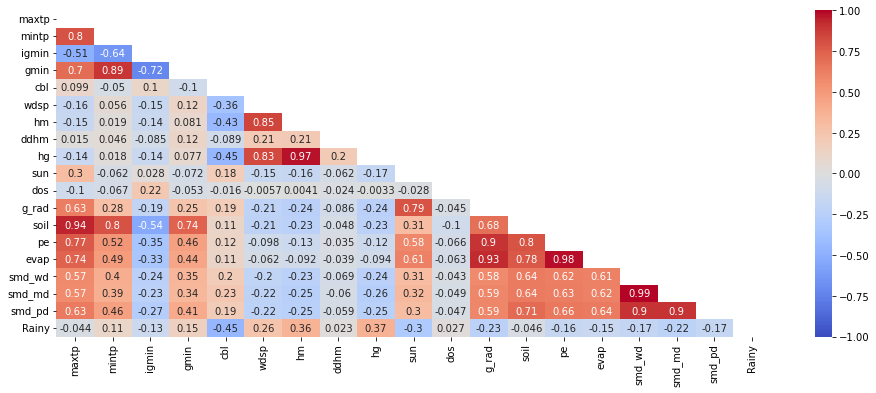

In [10]:
df.drop(columns="date")
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = df.iloc[:,1:18]
plt.figure(figsize=(16, 6))

np.triu(np.ones_like(df.corr()))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1,cmap='coolwarm', annot=True)
# heatmap.set_title('Correlation HeatMap', fontdict={'fontsize':12}, pad=12)

From the correlation heatmap, we could see soil, maxtp and mintp have a strong correlation. hm,hg and ddhm have a strong correlation. And smd_wd,smd_md,smd_pd have a strong correlation. So
we should consider deleting some columns from them to avoid the effect of covariance on the fit.

In [11]:
# Standardized processing
cols=list(df.iloc[:,1:19])   # Choose list of columns to process
for item in cols:
    mean_tmp = np.mean(np.array(df[item]))
    std_tmp = np.std(np.array(df[item]))
    if(std_tmp):
        df[item] = df[item].apply(lambda x: (x - mean_tmp) / std_tmp)

df.head().round(2)

,date,maxtp,mintp,igmin,gmin,cbl,wdsp,hm,ddhm,hg,sun,dos,g_rad,soil,pe,evap,smd_wd,smd_md,smd_pd,Rainy
0,1-Jan-01,-0.53,-0.28,-0.55,-0.49,0.05,-0.07,0.01,-0.17,0.05,-0.99,-0.05,-1.12,-1.11,-1.0,-1.06,-0.82,-0.80,-0.91,1
1,2-Jan-01,-0.93,-1.07,1.73,-0.80,0.05,-0.14,0.33,0.90,0.38,-1.10,-0.05,-1.15,-1.06,-1.1,-1.12,-0.82,-0.81,-0.91,1
2,3-Jan-01,-1.16,-1.05,1.73,-0.95,-2.39,0.01,-0.30,0.19,-0.28,-1.07,-0.05,-1.20,-1.40,-1.1,-1.12,-0.82,-1.00,-0.91,1
3,4-Jan-01,-1.34,-1.34,1.73,-0.86,-2.52,-1.05,-0.94,0.54,-1.04,-0.97,-0.05,-1.09,-1.28,-1.4,-1.39,-0.82,-0.74,-0.89,-1
4,5-Jan-01,-2.29,-1.58,1.73,-1.83,-2.35,-0.80,-0.62,0.54,-0.72,-1.10,-0.05,-1.12,-1.54,-1.4,-1.39,-0.82,-0.74,-0.87,-1


In [13]:
df.to_csv("dly532_processed.csv",index = False)